In [4]:
import torch
import torchvision
import torchvision.datasets as datasets
import sys
import numpy as np
import torch.utils.data as utils
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
sys.path.append("../../Dataset-REPAIR")
from utils.datasets import ColoredDataset
import pickle as pkl

from os.path import join as oj
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
save_path = "../results_for_export"

In [6]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("purple"),10))
colors = [x.get_rgb() for x in colors]

In [7]:
colors = np.asarray(colors)[:,:, None, None]
# colors /=colors.sum(axis =1)[:, None]


In [8]:
x_train = np.load(oj("../data/ColorMNIST", "train_x.npy"))
y_train = np.load(oj("../data/ColorMNIST", "train_y.npy"))

In [9]:
x_test = np.load(oj("../data/ColorMNIST", "test_x.npy"))
y_test = np.load(oj("../data/ColorMNIST", "test_y.npy"))

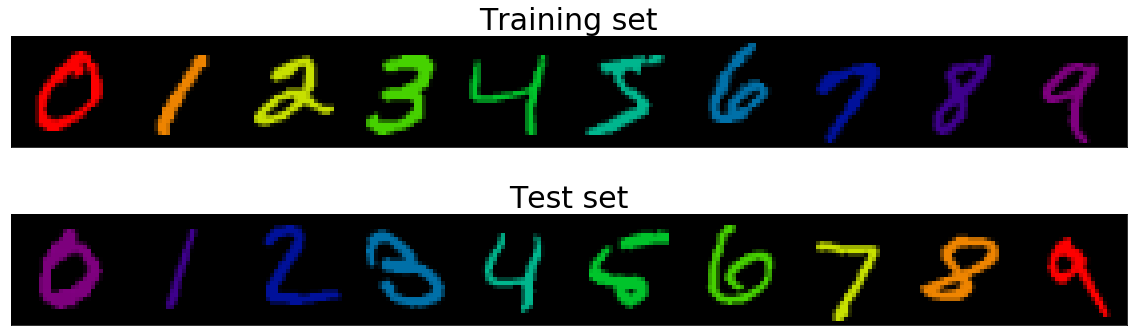

In [10]:
fig, axes = plt.subplots(nrows= 2, figsize = (20, 6))
indices = []
for i in range(10):
    indices.append(np.where(y_train ==i)[0][0])
ex_imgs = np.hstack(x_train[np.asarray(indices)].swapaxes(1,3).swapaxes(1,2)) +1
ex_imgs/=2
axes[0].imshow(ex_imgs);
axes[0].set_title("Training set", fontsize = 30)
indices = []
for i in range(10):
    indices.append(np.where(y_test ==i)[0][0])
ex_imgs = np.hstack(x_test[np.asarray(indices)].swapaxes(1,3).swapaxes(1,2)) +1
ex_imgs/=2
axes[1].imshow(ex_imgs);
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].set_title("Test set", fontsize = 30)
fig.savefig(oj(save_path, "ColorMNIST_examples"))


In [37]:

blob = np.zeros((28,28))
blob[:2, :2 ] =1
blob[-2:, :2] = 1
blob[:2, -2: ] =1
blob[-2:, -2:] = 1

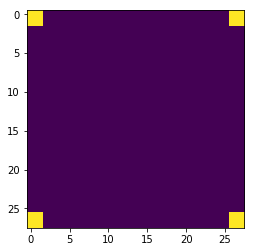

In [38]:
plt.imshow(blob)

In [39]:
colors = np.linspace(10, 255, num =10)[::-1]

In [40]:
colors

array([255.        , 227.77777778, 200.55555556, 173.33333333,
       146.11111111, 118.88888889,  91.66666667,  64.44444444,
        37.22222222,  10.        ])

In [41]:
colors = np.linspace(10, 255, num =10)

In [42]:
colors

array([ 10.        ,  37.22222222,  64.44444444,  91.66666667,
       118.88888889, 146.11111111, 173.33333333, 200.55555556,
       227.77777778, 255.        ])

In [88]:
x_train = np.load(oj("../data/ColorMNIST", "train_x_decoy.npy"))
y_train = np.load(oj("../data/ColorMNIST", "train_y.npy"))

In [89]:
y_train[2]

4

In [96]:
x_train[3][0,0,0]

-0.70980394

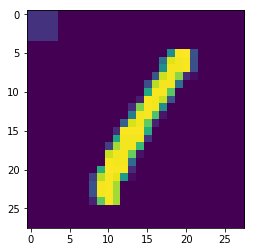

In [91]:
plt.imshow(x_train[3][0])

In [46]:
x_train[2][0,-1,-1]

118

In [47]:
colors = np.linspace(10, 255, num =10)

In [71]:
colors

array([ 10.        ,  37.22222222,  64.44444444,  91.66666667,
       118.88888889, 146.11111111, 173.33333333, 200.55555556,
       227.77777778, 255.        ])

In [109]:
x_test = np.load(oj("../data/ColorMNIST", "test_x_decoy.npy"))
y_test = np.load(oj("../data/ColorMNIST", "test_y.npy"))

In [110]:
x_test[5][0,0,0]

0.8039216

In [111]:
np.random.choice(255)

19

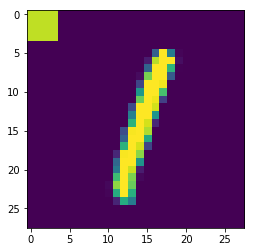

In [112]:
plt.imshow(x_test[5][0])

In [61]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [120]:
train_x_tensor = torch.Tensor(np.load(oj("../data/ColorMNIST", "train_x_decoy.npy")))
train_y_tensor = torch.Tensor(np.load(oj("../data/ColorMNIST", "train_y.npy"))).type(torch.int64)

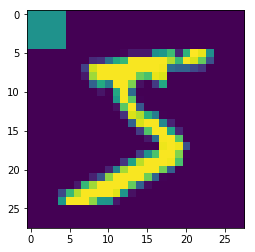

In [121]:
plt.imshow(train_x_tensor[0,0])

In [69]:
train_x_tensor.numpy()

array([[[[ 0.14509809,  0.14509809, -1.        , ..., -1.        ,
          -1.        , -1.        ],
         [ 0.14509809,  0.14509809, -1.        , ..., -1.        ,
          -1.        , -1.        ],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         ...,
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ]]],


       [[[-1.        , -1.        , -1.        , ..., -1.        ,
          -0.92156863, -0.92156863],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -0.92156863, -0.92156863],
         [-1.        , -1.        , -1.        , ..., -1.        ,
          -1.        , -1.        ],
         ...,
         [-1.        , -1.      

In [113]:
test_x_tensor = torch.Tensor(np.load(oj("../data/ColorMNIST", "test_x_decoy.npy")))
test_y_tensor = torch.Tensor(np.load(oj("../data/ColorMNIST", "test_y.npy"))).type(torch.int64)

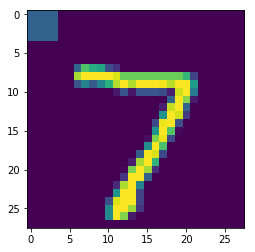

In [114]:
plt.imshow(test_x_tensor[0,0])